[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


<AxesSubplot:xlabel='celsius'>

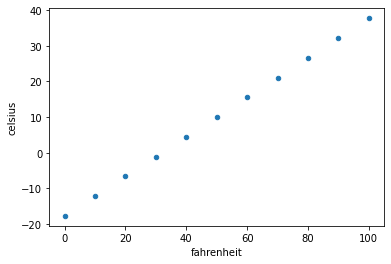

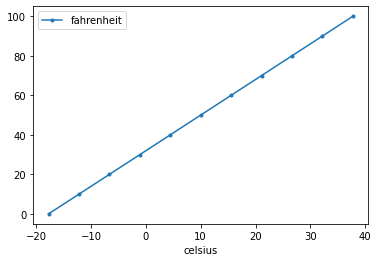

In [6]:
import pandas as pd
# This is the relationship between celsius and fahrenheit
# f = 1.8 * c + 32
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]
# [
# (0, -17.77777777777778),
# (10, -12.222222222222223),
# (20, -6.666666666666667),
# (30, -1.1111111111111112),
# (40, 4.444444444444445),
# (50, 10.0),
# (60, 15.555555555555557),
# (70, 21.11111111111111),
# (80, 26.666666666666668),
# (90, 32.22222222222222),
# (100, 37.77777777777778)
# ]
# You can see that the relationship is linear i.e. As the temperature increases, the fahrenheit increases by 1.8
# We can use this to predict the temperature in celsius
# given the temperature in fahrenheit

# Create a dataframe from the list of tuples
temps_df = pd.DataFrame(temps, columns=['fahrenheit', 'celsius'])

# Plot the data
temps_df.plot(x='fahrenheit', y='celsius', kind='scatter')
temps_df.plot(x='celsius', y='fahrenheit', style='.-')

Time Series and Simple Linear Regression-- Loading the Average Hit Temperatures into a DataFrame

In [27]:
nyc = pd.read_csv('USH00305801-tavg-1-3-1895-2019.csv')
# Change the columns to something we can use
# This happens in place or in memory. i.e it doesn't change the file
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()
# 	Date	  Temperature	Anomaly
# 0	189503	35.7	      -4.8
# 1	189603	31.2	      -9.3
# 2	189703	39.3	      -1.2
# 3	189803	44.6	      4.1
# 4	189903	36.7	      -3.8
# As you can see, the date is in the format YYYYMM
# Since all the months are 03, we can just take the first 4 characters to represent the year
# nyc['Year'] = nyc['Date'].apply(lambda x: str(x)[:4])
nyc.Date.dtype # dtype('int64')
# We can see that the date is an integer. We can either convert it to a string or use math to get the year
# nyc['Date'] = nyc['Date'] // 100
nyc.Date = nyc.Date.floordiv(100)
nyc.head()
# 	Date	Temperature	Anomaly
# 0	1895	35.7	      -4.8
# 1	1896	31.2	      -9.3
# 2	1897	39.3	      -1.2
# 3	1898	44.6	      4.1
# 4	1899	36.7	      -3.8

pd.set_option('precision', 2)

nyc.Temperature.describe()
# count    125.00
# mean      39.52
# std       13.06
# min      -99.00
# 25%       38.10
# 50%       40.60
# 75%       42.90
# max       50.90
# Name: Temperature, dtype: float64

# Plot the data
# nyc.plot(x='Date', y='Temperature', kind='scatter')
# nyc.plot(x='Date', y='Temperature', style='.-')

count    125.00
mean      39.52
std       13.06
min      -99.00
25%       38.10
50%       40.60
75%       42.90
max       50.90
Name: Temperature, dtype: float64

In [37]:
# Perform linear regression
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

# The slope is the change in y for a change in x
linear_regression.slope # 0.027189554531490023
# The intercept is the y value when x is 0
linear_regression.intercept # -13.69315821812598

# Predict the temperature in 2020
linear_regression.slope * 2020 + linear_regression.intercept # 41.229741935483865

41.229741935483865

(20.0, 60.0)

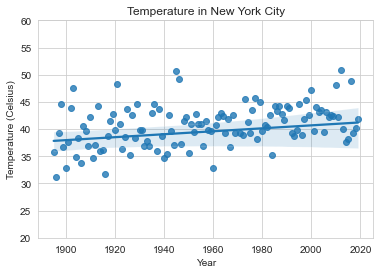

In [40]:
import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_title('Temperature in New York City')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (Celsius)')
axes.set_ylim(20, 60)
